In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Expanded_data_with_more_features.csv')
df.head(3)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [2]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc                0
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [5]:

df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', 'Basic'],
      dtype=object)

In [4]:
df['ParentEduc'] = df['ParentEduc'].fillna('Basic')

In [ ]:
# We are most of the concerned with numeric data , so no need to fill aall the nan
# no use of unnamed column
df.drop('Unnamed: 0', axis=1) # with vertical axis  delete

In [19]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

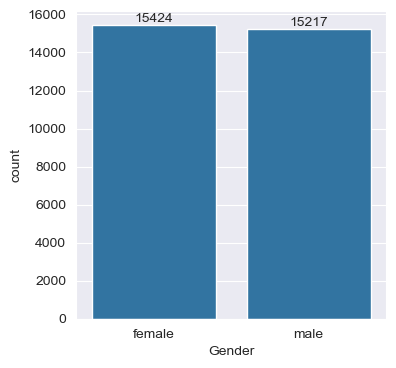

In [24]:
# now step to Analysis
plt.figure(figsize=(4,4))  
# for exact numbers of male and female
ax= sns.countplot(x= 'Gender', data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [7]:
# Now analyze impact of parents education on students score
gb=  df.groupby('ParentEduc').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})

In [8]:
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
Basic,66.645528,69.225474,68.295935
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


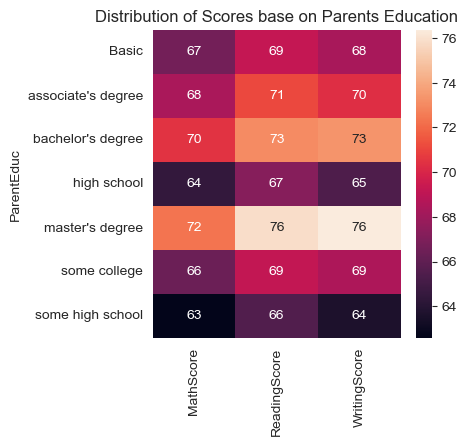

In [26]:
# heatmap is used when one column of string and other is of numeric
plt.figure(figsize=(4,4)) 
sns.heatmap(gb, annot= True)
plt.title('Distribution of Scores base on Parents Education')
plt.show()

In [ ]:
# result: Students of parents with Master's degree got highest marks


In [11]:
# Now analyze  scores on the basis of Parent Marital Status
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


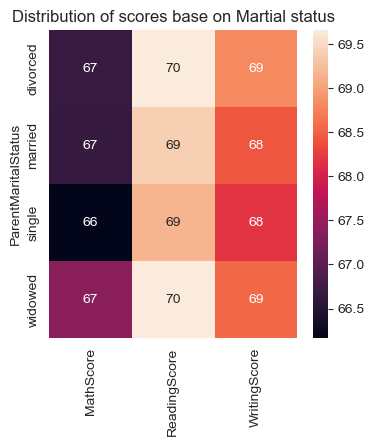

In [25]:
plt.figure(figsize=(4,4)) 
sns.heatmap(gb1, annot= True)
plt.title('Distribution of scores base on Martial status')
plt.show()

In [ ]:
# difference is very minor
# relationship can be seen on various bases like 'NrSiblings' , 'PracticeSport',
# 'IsFirstChild'  and between scores


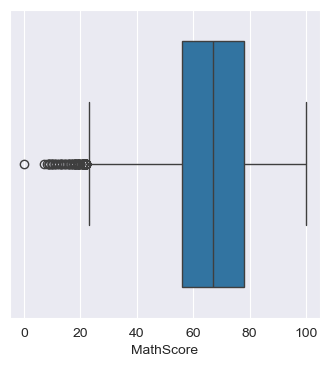

In [13]:
# to check ouliers in score
plt.figure(figsize=(4,4)) 
sns.boxplot(data = df, x = 'MathScore')
plt.show()

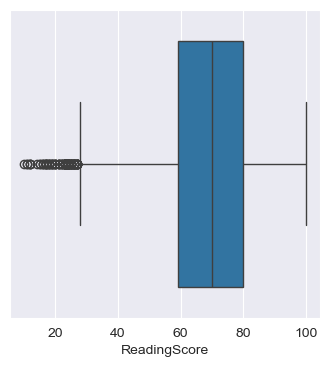

In [15]:
# marks are in the range of 20-100
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x = 'ReadingScore')
plt.show()

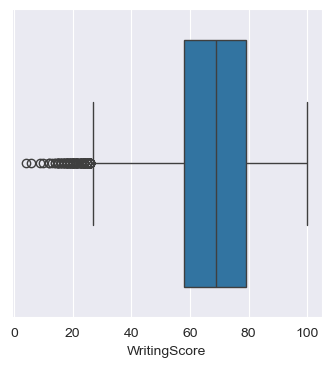

In [16]:
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x = 'WritingScore')
plt.show()

In [18]:
# Analyzing the Ethnic groups
x = df['EthnicGroup'].value_counts().index
x

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='EthnicGroup')

In [19]:
y = df['EthnicGroup'].value_counts().values
y

array([9212, 7503, 5826, 4041, 2219], dtype=int64)

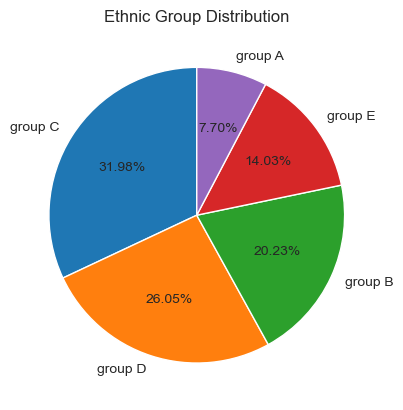

In [23]:
plt.pie(y, labels=x, autopct='%0.2f%%', startangle=90)
plt.title('Ethnic Group Distribution')
plt.show()